Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

Tugas 1: Multiple Linear Regression

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

Dataset Medical Cost Personal Datasets memiliki 1338 baris dan 7 kolom. Berikut adalah variabel-variabel dalam dataset ini:

age: Umur individu (int).
sex: Jenis kelamin individu (female/male) (object).
bmi: Body Mass Index (BMI), pengukuran berdasarkan tinggi dan berat individu (float).
children: Jumlah anak yang dimiliki individu (int).
smoker: Status merokok (yes/no) (object).
region: Wilayah tempat tinggal individu (northeast/northwest/southeast/southwest) (object).
charges: Biaya medis personal (float), yang menjadi target (variabel dependen) dalam analisis regresi ini.

Variabel bebas yang digunakan adalah: age, bmi dan smoker
Variabel target yang digunakan adalah: charges

In [38]:
# import package
import numpy as np
import pandas as pd

In [39]:
data = pd.read_csv('insurance.csv')

In [40]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

data = pd.read_csv('insurance.csv')

In [43]:
# Melihat beberapa data awal
df = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data yang diberikan merupakan DataFrame yang sudah didefinisikan sebelumnya. pada data tersebut menghasilkan DataFrame baru dengan daftar kolom [['age', 'sex', 'children', 'smoker', 'region', 'charges']] yang dipilih dari DataFrame data.

Code df.head() digunakan untuk menampilkan lima bris pertama dari DataFrame yang baru.

**Encoding Data**
sebelum mengeksekusi data lebih lanjut, harus dilakukan encoding data terlebih dahulu, hal ini dilakukan untuk mengubah variabel kategori (data kualitatif) menjadi bentuk yang dapat digunakan oleh model pembelajaran mesin yang umumnya hanya mengoperasikan data numerik (data kuantitatif) 

In [44]:
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])

**Visualisai Data**

visualisasi data dengan pairplot

c:\Users\cinthya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\cinthya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


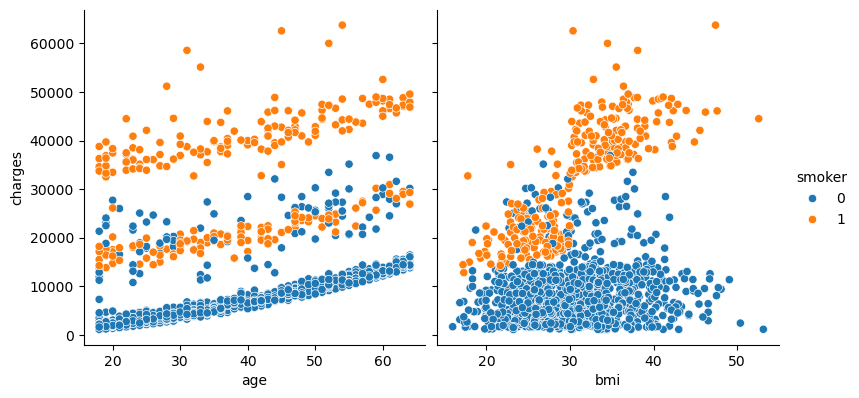

In [45]:
sns.pairplot(data, x_vars=['age', 'bmi'], 
             y_vars='charges', size=4, aspect=1, kind='scatter', hue='smoker')

plt.show()

visualisasi korelasi dengan heatmap

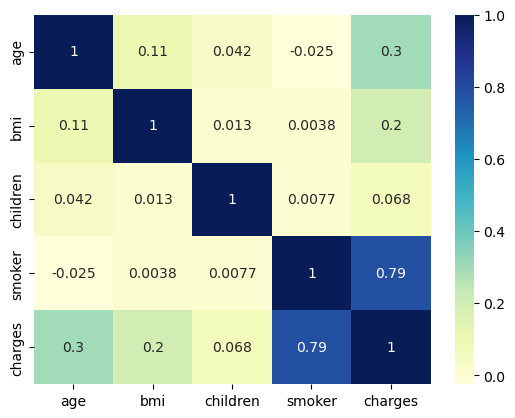

In [46]:
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()


Hasil pada heatmap korelasi diatas menunjukkan bahwa korelasi terkuat adalah antara smoker dan charges (0.79) hal ini menunjukkan bahwa menjadi perokok memiliki dampak besar terhadap biaya.

Ada beberapa korelasi lemah antara variabel lain, misalnya antara age dan charges (0.3), serta antara bmi dan charges (0.2), yang menunjukkan bahwa usia dan BMI juga sedikit memengaruhi biaya, meskipun pengaruhnya tidak terlalu signifikan dibandingkan dengan status perokok.

Hubungan antar variabel lain seperti children dengan variabel lainnya sangat lemah, menunjukkan bahwa jumlah anak tidak memiliki dampak besar pada variabel lain dalam dataset ini.

Biaya medis personal (charges) cenderung berubah seiring dengan usia pasien dan sedikit dipengaruhi oleh BMI mereka. Namun, faktor yang paling memengaruhi biaya adalah status perokok, dengan perokok cenderung membayar biaya medis yang jauh lebih tinggi.

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [47]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data[['age', 'bmi', 'smoker']]
Y = data['charges']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

Kode program di atas digunakan untuk melakukan persiapan data dalam konteks model pembelajaran mesin untuk memprediksi biaya medis (charges) berdasarkan variabel-variabel tertentu.

Pembuatan Variabel Bebas (X) dan Variabel Respon (Y):

X = data[['age', 'bmi', 'smoker']]: Variabel X diatur sebagai matriks fitur yang berisi kolom-kolom age, bmi, dan smoker dari dataframe data.

Y = data['charges']: Variabel Y merupakan vektor target yang berisi nilai-nilai dari kolom charges pada dataframe data. Variabel ini adalah yang ingin diprediksi dalam model pembelajaran mesin.

Pada kode program tersebut saya membagi data dengan 30% data akan digunakan sebagai data uji dan sisanya 70% akan digunakan sebagai data latih. Dengan random_state=1000 digunakan untuk memastikan bahwa pembagian data tetap konsisten setiap kali kode dijalankan, yang membantu dalam kestabilan hasil eksperimen.

3. Lakukan feature scaling jika diperlukan.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Scaling sangat penting ketika kita menggunakan algoritma berbasis jarak seperti SVM (Support Vector Machines). Model seperti ini peka terhadap perbedaan skala antara fitur-fitur yang berbeda. Misalnya, jika satu fitur berada dalam rentang 0-1000 dan fitur lain dalam rentang 0-1, fitur dengan skala yang lebih besar akan lebih mendominasi hasil pelatihan, yang dapat menyebabkan performa model menjadi tidak optimal.

Langkah ini bertujuan untuk melakukan normalisasi terhadap fitur-fitur numerik (misalnya age, bmi, dan smoker setelah di-encode) di dalam dataset.

fit_transform berfungsi untuk menghitung mean dan standar deviasi dari data latih (X_train), lalu menggunakan nilai-nilai tersebut untuk menstandarkan data latih.

Normalisasi ini membuat setiap fitur dalam X_train memiliki rata-rata (mean) = 0 dan standar deviasi (std) = 1.

Setelah StandardScaler di-fit dengan data latih, kita menggunakan parameter yang sama untuk menstandarkan data uji (X_test).

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [49]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.predict(X_train)

print("------ Linear Regression ------")
print('Intercept: ', model.intercept_)
print('Koefisien: ', list(zip(X_train,model.coef_)))
print("-------------------------------")

------ Linear Regression ------
Intercept:  13079.44557269231
Koefisien:  [(array([ 0.47303227, -1.3746271 , -0.49966611]), 3605.6390291149814), (array([ 0.68497971,  0.44807831, -0.49966611]), 1710.0398000031191), (array([ 0.68497971,  0.86311716, -0.49966611]), 9385.710607155625)]
-------------------------------


Kode program ini memulai dengan pelatihan model regresi linear pada data latih (X_train dan Y_train) untuk memprediksi biaya medis berdasarkan fitur age, BMI, dan status perokok. Setelah itu, model mencetak intercept dan koefisien, yang menunjukkan bagaimana setiap fitur memengaruhi target. Selanjutnya, dilakukan normalisasi pada data menggunakan StandardScaler untuk memastikan bahwa semua fitur berada dalam skala yang sama. 

LinearRegression(): Membuat sebuah objek model regresi linear dari library scikit-learn. Model ini akan mencoba menemukan garis terbaik yang meminimalkan kesalahan (dalam hal ini, meminimalkan sum of squared errors) antara data yang diprediksi dan data aktual.

model.fit(X_train, Y_train): Melatih model dengan data latih (X_train) dan target (Y_train). Model ini akan belajar menemukan hubungan antara variabel input (fitur) dan variabel target (biaya medis).

model.intercept_: Mengembalikan nilai intercept dari model regresi linear. Intercept adalah nilai konstanta pada persamaan regresi linear, yaitu nilai prediksi ketika semua fitur (variabel input) bernilai nol.

model.coef_: Mengembalikan daftar koefisien dari model.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [51]:
# Membuat model SVR dengan kernel RBF
svr_model = SVR(kernel='rbf', C=100, gamma='scale')

# Melatih model SVR pada data latih
svr_model.fit(X_train, Y_train)

# Melakukan prediksi pada data uji
Y_pred_svr = svr_model.predict(X_test)

Kode program di atas bertujuan untuk membangun, melatih, dan melakukan prediksi menggunakan Support Vector Regression (SVR) dengan kernel Radial Basis Function (RBF).

SVR adalah metode regresi yang didasarkan pada prinsip Support Vector Machine (SVM), yang umumnya digunakan untuk klasifikasi, tetapi SVR digunakan untuk memprediksi nilai-nilai numerik (regresi).

Kernel 'rbf': Menggunakan kernel Radial Basis Function (RBF), yang merupakan salah satu kernel non-linear paling umum digunakan dalam SVM dan SVR. Kernel ini memungkinkan model untuk menangani hubungan non-linear antara fitur-fitur input dan target.

Parameter C mengontrol regularisasi. Nilai yang lebih tinggi dari C berarti model akan mencoba untuk menyesuaikan data dengan lebih ketat (mengurangi error training), tetapi bisa menyebabkan overfitting jika terlalu tinggi.

Parameter gamma menentukan seberapa jauh pengaruh satu data training meluas. Pengaturan gamma='scale' adalah default yang menyesuaikan nilai gamma berdasarkan jumlah fitur, dan biasanya bekerja cukup baik dalam banyak kasus.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

R-squared SVR:  0.4073608437627928
Mean Absolute Error SVR:  5083.276002901002
Mean Squared Error SVR:  95144359.44711006


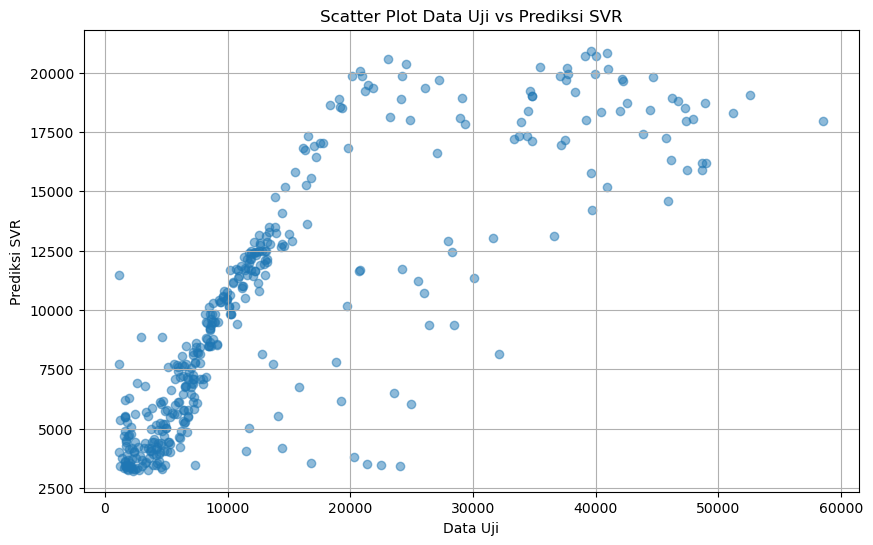

In [52]:
# Menghitung R-squared
r_squared_svr = r2_score(Y_test, Y_pred_svr)

# Menghitung Mean Absolute Error
mae_svr = mean_absolute_error(Y_test, Y_pred_svr)

# Menghitung Mean Squared Error
mse_svr = mean_squared_error(Y_test, Y_pred_svr)

# Menampilkan hasil prediksi
print("R-squared SVR: ", r_squared_svr)
print("Mean Absolute Error SVR: ", mae_svr)
print("Mean Squared Error SVR: ", mse_svr)

# Scatter plot data uji vs hasil prediksi svr
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_svr, alpha=0.5)
plt.title('Scatter Plot Data Uji vs Prediksi SVR')
plt.xlabel('Data Uji')
plt.ylabel('Prediksi SVR')
plt.grid(True)
plt.show()

Berikut adalah proses evaluasi model Support Vector Regression (SVR). Model ini digunakan untuk melakukan prediksi terhadap data uji (𝑌test) dan kemudian dilakukan perhitungan beberapa metrik evaluasi yang umum digunakan dalam regresi, yaitu R-squared (R²), Mean Absolute Error (MAE), dan Mean Squared Error (MSE).

R² adalah metrik yang digunakan untuk mengukur seberapa baik model regresi memprediksi data uji. Nilai R² berada di antara 0 hingga 1. Nilai 1 menunjukkan bahwa prediksi model sangat sesuai dengan data asli, sementara 0 menunjukkan model tidak lebih baik dari rata-rata data.

Hasil: R-squared SVR: 0.4073608437627928, ini berarti sekitar 40.7% dari variasi data uji dapat dijelaskan oleh model SVR.

R² yang rendah (0.41) menunjukkan bahwa model SVR tidak terlalu baik dalam menjelaskan variasi data uji.

Nilai MAE dan MSE yang cukup besar menunjukkan bahwa terdapat perbedaan yang signifikan antara nilai sebenarnya dan prediksi.

Dari grafik scatter plot, terlihat bahwa meskipun ada beberapa hubungan linier antara data uji dan prediksi, banyak data yang tersebar dan tidak mengikuti pola prediksi yang baik.